<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Creating_geodataframe_from_coordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Creating a geodataframe from (x,y) coordinates**

In this notebook, you will learn how to create a `GeoDataFrame` from a list of coordinates in python using `geopandas` library.

First of all, lets find some interesting cities. Here is a list of mine. Each place is linked with a pair of coordinates: latitude and longitude. 

Cities     | Latitude   | Longitude
-----------|------------| -------------
San Diego  | 32.715736  | -117.161087
Los Angeles| 34.052234  | -118.243684
Irvine     | 33.669445  | -117.823059
Long Beach | 33.770050  | -118.193741
San Francisco | 37.773972 | -122.431297  

Now, let's try to make a `GeoDataFrame` using these list of places and their coordinates.


In [61]:
cities = [['San Diego', 32.715736, -117.161087], 
          ['Los Angeles', 34.052234, -118.243684],
          ['Irvine', 33.669445, -117.823059],
          ['Long Beach', 33.770050, -118.193741],
          ['San Francisco', 	37.773972, -122.431297]] 

In [62]:
cities

[['San Diego', 32.715736, -117.161087],
 ['Los Angeles', 34.052234, -118.243684],
 ['Irvine', 33.669445, -117.823059],
 ['Long Beach', 33.77005, -118.193741],
 ['San Francisco', 37.773972, -122.431297]]

In [63]:
import pandas as pd
cities_df = pd.DataFrame(cities, columns = ['Cities', 'Lat','Long']) 

In [64]:
cities_df

,Cities,Lat,Long
0,San Diego,32.715736,-117.161087
1,Los Angeles,34.052234,-118.243684
2,Irvine,33.669445,-117.823059
3,Long Beach,33.770050,-118.193741
4,San Francisco,37.773972,-122.431297


After that, we can use the method provided in geopandas `geopandas.points_from_xy(longitude, latitude)` to convert an ordinary `DataFrame` to a `GeoDataFrame`.



In [5]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 53.4 MB/s 
     |████████████████████████████████| 16.7 MB 326 kB/s 


In [6]:
cities_gdf = gpd.GeoDataFrame(
    cities_df, geometry=gpd.points_from_xy(cities_df.Long, cities_df.Lat))

Now, let's try and plot the points to see if the `GeodataFrame` was created correctly.

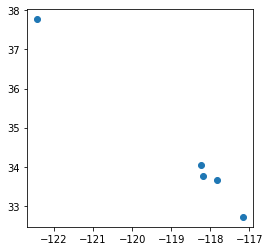

In [7]:
cities_gdf.plot()

For a better look at the points, we need a basemap to understand if the locations are correctly placed, let's read in the US map we have made in Week 5.

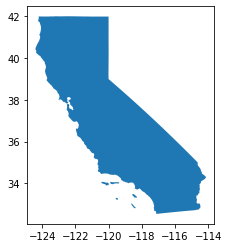

In [8]:
%matplotlib inline
CA = gpd.read_file("./sample_data/California_state.shp")
CA.plot()

Overlay the points with the California state shapefile.

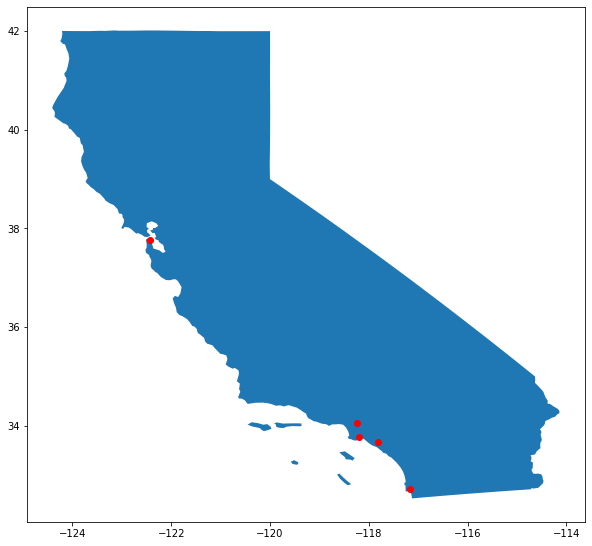

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,figsize=(10,10))
CA.plot(ax=ax)
cities_gdf.plot(ax=ax,color="red")

Try to change the point style and color of the basemap.

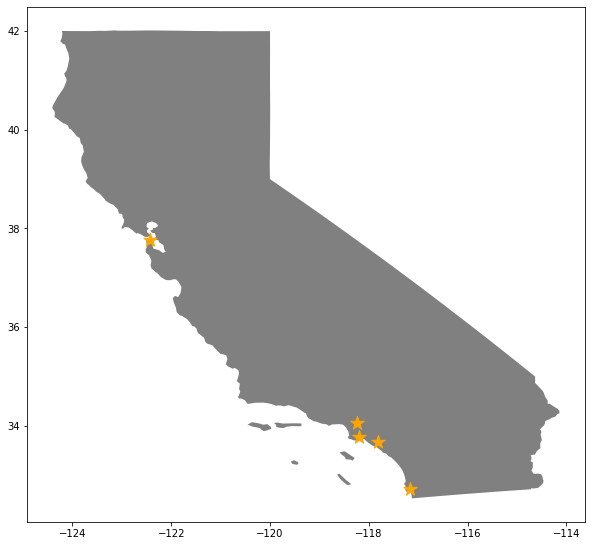

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
CA.plot(ax=ax, color = "grey")
cities_gdf.plot(ax=ax,color="orange", marker = "*" , markersize = 200)

Now lets try adding a new city to the cities list.

City      | Latitude | Longitude
----------|----------|----------
Fresno    |36.7854513|-119.9346459
Sacrameto |38.5616505|-121.5829968

In [65]:
cities_df = cities_df.append({'Cities': 'Fresno',	'Lat':36.7854513, 'Long': -119.9346459}, ignore_index = True)

In [66]:
cities_df = cities_df.append({'Cities': 'Sacramento',	'Lat':38.5616505, 'Long': -121.5829968}, ignore_index = True)

In [67]:
cities_df

,Cities,Lat,Long
0,San Diego,32.715736,-117.161087
1,Los Angeles,34.052234,-118.243684
2,Irvine,33.669445,-117.823059
3,Long Beach,33.770050,-118.193741
4,San Francisco,37.773972,-122.431297
5,Fresno,36.785451,-119.934646
6,Sacramento,38.561650,-121.582997


In [68]:
cities_gdf = gpd.GeoDataFrame(cities_df, geometry=gpd.points_from_xy(cities_df.Long, cities_df.Lat))

In [69]:
cities_gdf

,Cities,Lat,Long,geometry
0,San Diego,32.715736,-117.161087,POINT (-117.16109 32.71574)
1,Los Angeles,34.052234,-118.243684,POINT (-118.24368 34.05223)
2,Irvine,33.669445,-117.823059,POINT (-117.82306 33.66945)
3,Long Beach,33.770050,-118.193741,POINT (-118.19374 33.77005)
4,San Francisco,37.773972,-122.431297,POINT (-122.43130 37.77397)
5,Fresno,36.785451,-119.934646,POINT (-119.93465 36.78545)
6,Sacramento,38.561650,-121.582997,POINT (-121.58300 38.56165)


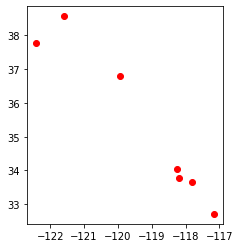

In [70]:
cities_gdf.plot(color="red")

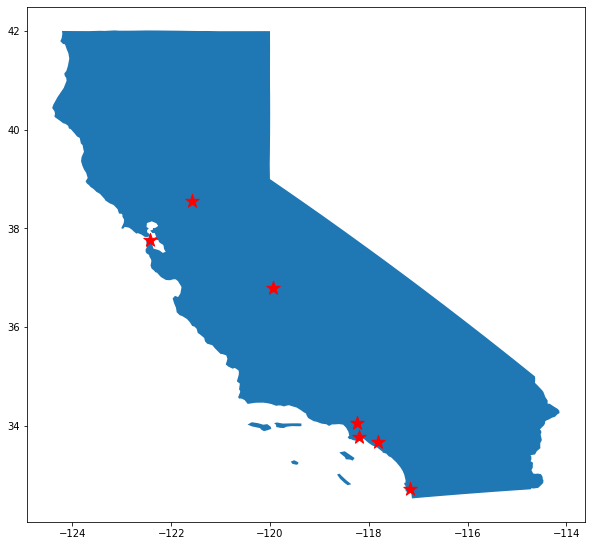

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1,figsize=(10,10))
CA.plot(ax=ax)
cities_gdf.plot(ax=ax,color="red", marker = '*', markersize = 200)